# ***Sales Prediction***
using the dataset advertising from kaggle


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('advertising.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

Saving advertising.csv to advertising (1).csv
Dataset Overview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Shape: (200, 4)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Descriptive Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     

In [24]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicate Rows: 0


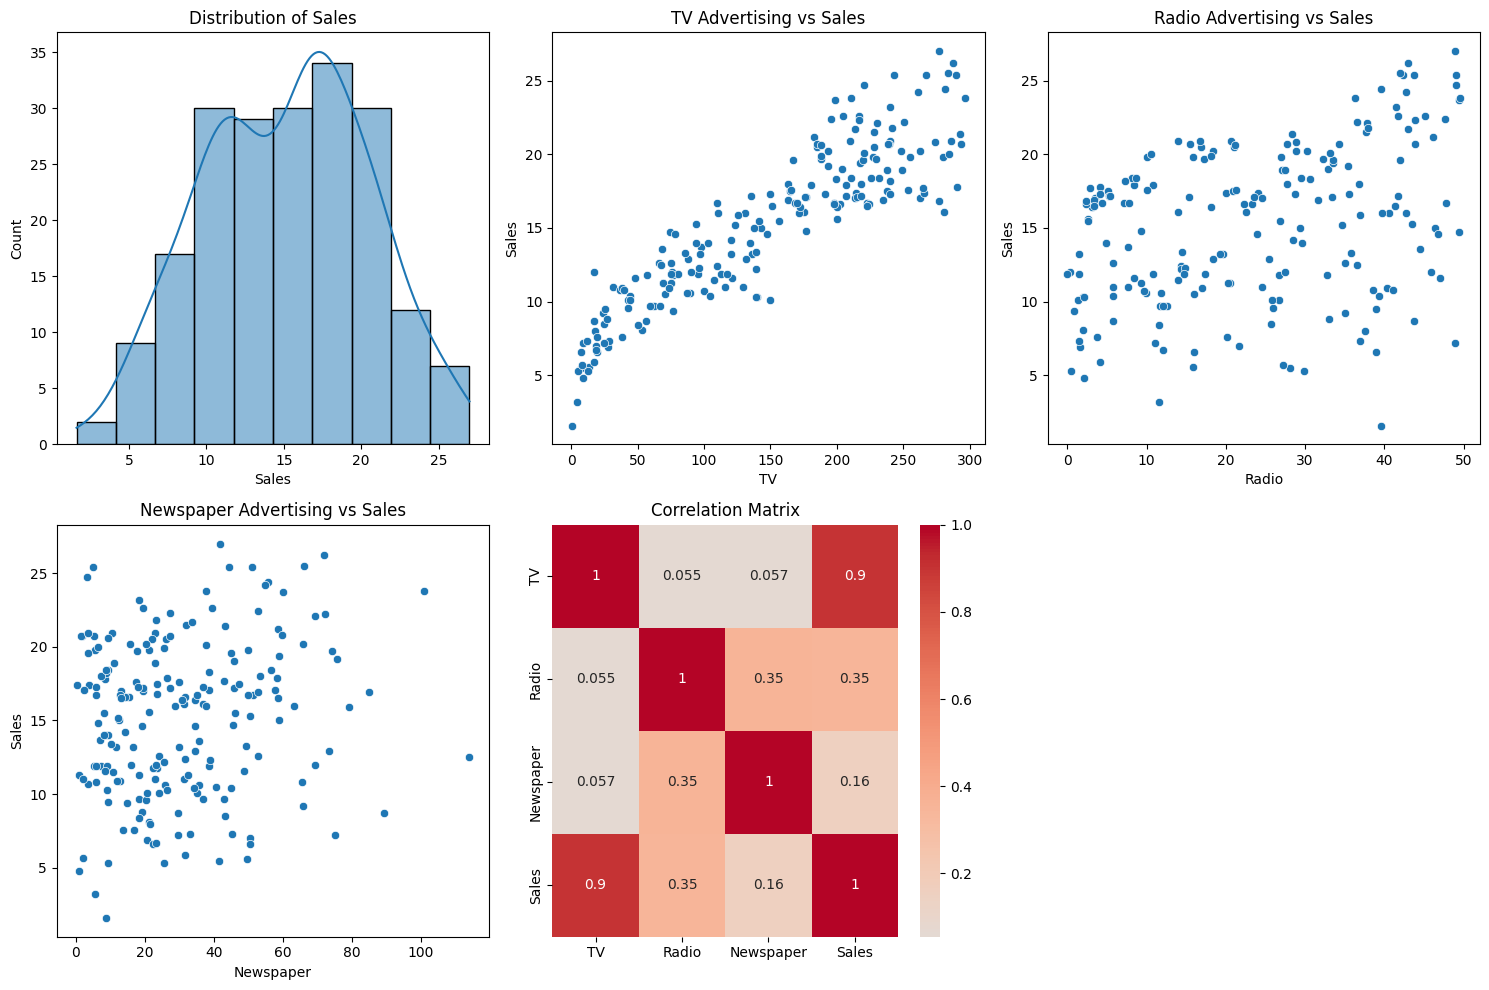

In [25]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# Distribution of Sales
plt.subplot(2, 3, 1)
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')

# TV vs Sales
plt.subplot(2, 3, 2)
sns.scatterplot(data=data, x='TV', y='Sales')
plt.title('TV Advertising vs Sales')

# Radio vs Sales
plt.subplot(2, 3, 3)
sns.scatterplot(data=data, x='Radio', y='Sales')
plt.title('Radio Advertising vs Sales')

# Newspaper vs Sales
plt.subplot(2, 3, 4)
sns.scatterplot(data=data, x='Newspaper', y='Sales')
plt.title('Newspaper Advertising vs Sales')

# Correlation heatmap
plt.subplot(2, 3, 5)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [26]:
# Prepare data for modeling
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (160, 3)
Testing set shape: (40, 3)


In [27]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2,
        'predictions': y_pred
    }

    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")


Linear Regression Performance:
RMSE: 1.7052
R² Score: 0.9059

Random Forest Performance:
RMSE: 1.1989
R² Score: 0.9535


Feature Importance:
     feature  importance
0         TV    0.845355
1      Radio    0.136642
2  Newspaper    0.018003


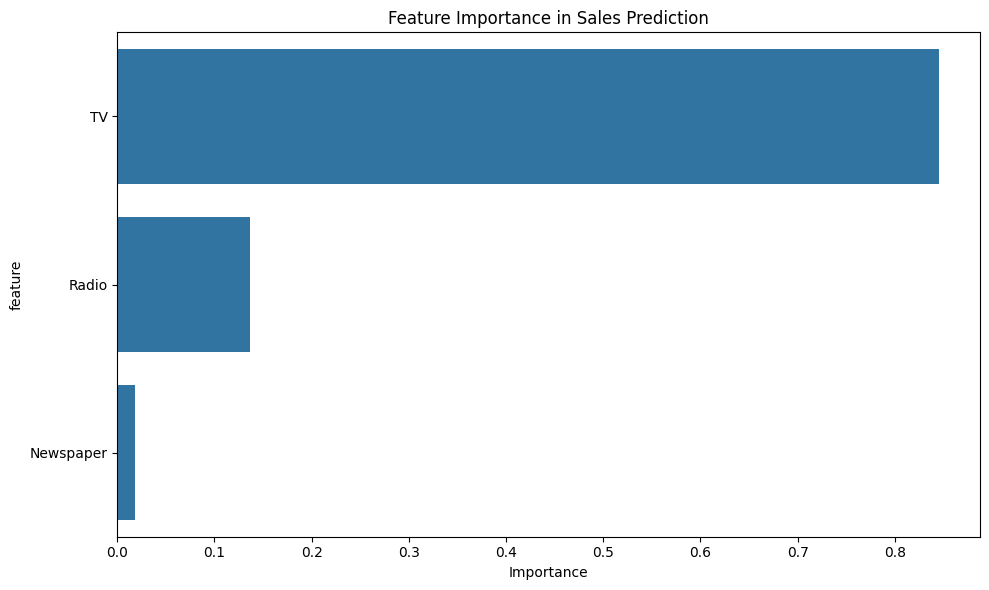

In [28]:
# Feature importance analysis
best_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Sales Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

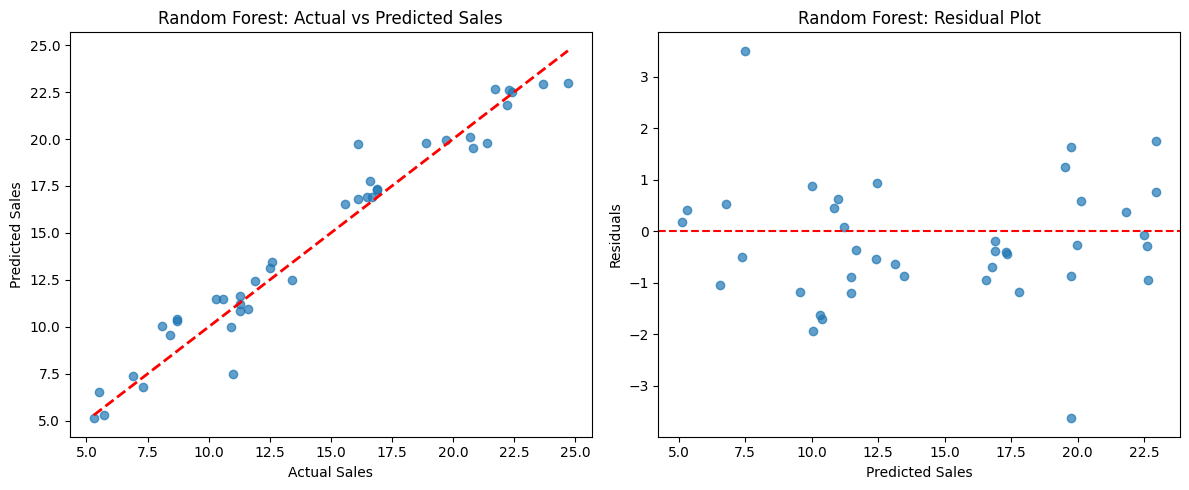

In [29]:
# Visualization of predictions vs actual values
best_model_name = min(results.keys(), key=lambda x: results[x]['rmse'])
best_result = results[best_model_name]

plt.figure(figsize=(12, 5))

# Predictions vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, best_result['predictions'], alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'{best_model_name}: Actual vs Predicted Sales')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - best_result['predictions']
plt.scatter(best_result['predictions'], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title(f'{best_model_name}: Residual Plot')

plt.tight_layout()
plt.show()

In [30]:
# Function to make predictions on new data
def predict_sales(tv_budget, radio_budget, newspaper_budget, model_type='Random Forest'):
    """
    Predict sales based on advertising budgets

    Parameters:
    tv_budget (float): TV advertising budget
    radio_budget (float): Radio advertising budget
    newspaper_budget (float): Newspaper advertising budget
    model_type (str): Type of model to use ('Random Forest' or 'Linear Regression')

    Returns:
    float: Predicted sales
    """
    model_info = results[model_type]
    model = model_info['model']

    # Create input array
    input_data = np.array([[tv_budget, radio_budget, newspaper_budget]])

    # Make prediction
    if model_type == 'Linear Regression':
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)
    else:
        prediction = model.predict(input_data)

    return prediction[0]

# Example prediction
example_prediction = predict_sales(200, 40, 30)
print(f"Predicted Sales for TV: $200, Radio: $40, Newspaper: $30 = ${example_prediction:.2f}")

Predicted Sales for TV: $200, Radio: $40, Newspaper: $30 = $20.93


In [31]:
# Optimization: Find optimal advertising mix for target sales
from scipy.optimize import minimize

def optimize_advertising_budget(target_sales, model_type='Random Forest', max_budget=300):
    """
    Find the optimal advertising budget mix to achieve target sales

    Parameters:
    target_sales (float): Desired sales amount
    model_type (str): Model to use for prediction
    max_budget (float): Maximum total advertising budget

    Returns:
    dict: Optimal budget allocation
    """

    def objective_function(x):
        # x[0] = TV, x[1] = Radio, x[2] = Newspaper
        predicted_sales = predict_sales(x[0], x[1], x[2], model_type)
        # Minimize the difference between predicted and target sales
        return (predicted_sales - target_sales) ** 2

    # Constraints: budgets must be positive and sum <= max_budget
    constraints = [
        {'type': 'ineq', 'fun': lambda x: max_budget - sum(x)},  # Total budget constraint
        {'type': 'ineq', 'fun': lambda x: x[0]},  # TV >= 0
        {'type': 'ineq', 'fun': lambda x: x[1]},  # Radio >= 0
        {'type': 'ineq', 'fun': lambda x: x[2]}   # Newspaper >= 0
    ]

    # Initial guess (equal distribution)
    x0 = [max_budget/3, max_budget/3, max_budget/3]

    # Optimize
    result = minimize(objective_function, x0, method='SLSQP', constraints=constraints)

    if result.success:
        optimal_budgets = {
            'TV': result.x[0],
            'Radio': result.x[1],
            'Newspaper': result.x[2],
            'Predicted_Sales': predict_sales(result.x[0], result.x[1], result.x[2], model_type),
            'Total_Budget': sum(result.x)
        }
        return optimal_budgets
    else:
        print("Optimization failed:", result.message)
        return None

# Example optimization
target = 20  # Target sales of $20,000
optimal_mix = optimize_advertising_budget(target)
print(f"\nOptimal Advertising Mix for Target Sales of ${target}:")
for medium, budget in optimal_mix.items():
    print(f"{medium}: ${budget:.2f}")


Optimal Advertising Mix for Target Sales of $20:
TV: $100.00
Radio: $100.00
Newspaper: $100.00
Predicted_Sales: $15.53
Total_Budget: $300.00


In [32]:
# Make predictions using the trained models
print("=== SALES PREDICTIONS ===")
print("=" * 50)

# Example 1: Current data point from the dataset
print("\n📊 Example 1: Prediction for a known data point")
sample_data = data.iloc[0]
tv_budget = sample_data['TV']
radio_budget = sample_data['Radio']
newspaper_budget = sample_data['Newspaper']
actual_sales = sample_data['Sales']

# Make prediction
predicted_sales_rf = predict_sales(tv_budget, radio_budget, newspaper_budget, 'Random Forest')
predicted_sales_lr = predict_sales(tv_budget, radio_budget, newspaper_budget, 'Linear Regression')

print(f"Input: TV=${tv_budget}, Radio=${radio_budget}, Newspaper=${newspaper_budget}")
print(f"Actual Sales: ${actual_sales}")
print(f"Random Forest Prediction: ${predicted_sales_rf:.2f}")
print(f"Linear Regression Prediction: ${predicted_sales_lr:.2f}")
print(f"Random Forest Error: ${abs(actual_sales - predicted_sales_rf):.2f}")

=== SALES PREDICTIONS ===

📊 Example 1: Prediction for a known data point
Input: TV=$230.1, Radio=$37.8, Newspaper=$69.2
Actual Sales: $22.1
Random Forest Prediction: $22.02
Linear Regression Prediction: $21.37
Random Forest Error: $0.08


In [33]:
# Example 2: New scenarios for business planning
print("\n🎯 Example 2: Business Scenario Predictions")
print("=" * 50)

# Scenario 1: High TV budget
print("\n📺 Scenario 1: High TV Focus")
scenario1_pred = predict_sales(300, 20, 10)
print(f"TV: $300, Radio: $20, Newspaper: $10")
print(f"Predicted Sales: ${scenario1_pred:.2f}")

# Scenario 2: Balanced budget
print("\n⚖️ Scenario 2: Balanced Approach")
scenario2_pred = predict_sales(150, 100, 50)
print(f"TV: $150, Radio: $100, Newspaper: $50")
print(f"Predicted Sales: ${scenario2_pred:.2f}")

# Scenario 3: Radio-focused
print("\n📻 Scenario 3: Radio Focus")
scenario3_pred = predict_sales(50, 200, 25)
print(f"TV: $50, Radio: $200, Newspaper: $25")
print(f"Predicted Sales: ${scenario3_pred:.2f}")


🎯 Example 2: Business Scenario Predictions

📺 Scenario 1: High TV Focus
TV: $300, Radio: $20, Newspaper: $10
Predicted Sales: $20.24

⚖️ Scenario 2: Balanced Approach
TV: $150, Radio: $100, Newspaper: $50
Predicted Sales: $17.10

📻 Scenario 3: Radio Focus
TV: $50, Radio: $200, Newspaper: $25
Predicted Sales: $11.45


In [34]:
# Batch predictions on test set
print("\n📈 Batch Predictions on Test Set")
print("=" * 50)

# Get predictions for all test data
# The predict_sales function expects individual budget values for TV, Radio, Newspaper.
# X_test is a DataFrame, so we need to apply the function row-wise.
test_predictions = X_test.apply(lambda row: predict_sales(row['TV'], row['Radio'], row['Newspaper'], 'Random Forest'), axis=1)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Actual_Sales': y_test.values,
    'Predicted_Sales': test_predictions,
    'Absolute_Error': np.abs(y_test.values - test_predictions)
})

# Display first 10 predictions
print("First 10 Predictions vs Actual:")
print(comparison_df.head(10).round(2))

# Overall performance
avg_error = comparison_df['Absolute_Error'].mean()
accuracy_within_1 = (comparison_df['Absolute_Error'] <= 1.0).mean() * 100

print(f"\n📊 Prediction Performance Summary:")
print(f"Average Prediction Error: ${avg_error:.2f}")
print(f"Predictions within $1.00 of actual: {accuracy_within_1:.1f}%")


📈 Batch Predictions on Test Set
First 10 Predictions vs Actual:
     Actual_Sales  Predicted_Sales  Absolute_Error
95           16.9            17.30            0.40
15           22.4            22.48            0.08
30           21.4            19.77            1.63
158           7.3             6.78            0.52
128          24.7            22.96            1.74
115          12.6            13.47            0.87
69           22.3            22.59            0.29
170           8.4             9.58            1.18
174          16.5            16.89            0.39
45           16.1            16.79            0.69

📊 Prediction Performance Summary:
Average Prediction Error: $0.92
Predictions within $1.00 of actual: 70.0%


In [38]:
# Interactive prediction function
def interactive_prediction():
    """
    Interactive function to get predictions for custom inputs
    """
    print("\n🎛️ Interactive Sales Prediction")
    print("=" * 40)

    try:
        tv = float(input("Enter TV advertising budget ($): "))
        radio = float(input("Enter Radio advertising budget ($): "))
        newspaper = float(input("Enter Newspaper advertising budget ($): "))

        # Make prediction
        prediction = predict_sales(tv, radio, newspaper, 'Random Forest')

        print(f"\n🎯 PREDICTION RESULT:")
        print(f"TV: ${tv:.2f}")
        print(f"Radio: ${radio:.2f}")
        print(f"Newspaper: ${newspaper:.2f}")
        print(f"📈 Predicted Sales: ${prediction:.2f}")

        # ROI calculation
        total_cost = tv + radio + newspaper
        roi = ((prediction - total_cost) / total_cost) * 100 if total_cost > 0 else 0

        print(f"💰 Total Advertising Cost: ${total_cost:.2f}")
        print(f"📊 Estimated ROI: {roi:.1f}%")

        return prediction

    except ValueError:
        print("❌ Please enter valid numbers!")
        return None

interactive_prediction()


🎛️ Interactive Sales Prediction
Enter TV advertising budget ($): 5678
Enter Radio advertising budget ($): 9876
Enter Newspaper advertising budget ($): 45687

🎯 PREDICTION RESULT:
TV: $5678.00
Radio: $9876.00
Newspaper: $45687.00
📈 Predicted Sales: $26.06
💰 Total Advertising Cost: $61241.00
📊 Estimated ROI: -100.0%


np.float64(26.062)

In [36]:
# Make actual predictions - Run this cell to see results
print("🚀 MAKING PREDICTIONS WITH YOUR DATA")
print("=" * 50)

# Function to make batch predictions
def predict_sales_batch(X_data, model_type='Random Forest'):
    """
    Make predictions on multiple data points
    """
    model_info = results[model_type]
    model = model_info['model']

    if model_type == 'Linear Regression':
        X_scaled = scaler.transform(X_data)
        predictions = model.predict(X_scaled)
    else:
        predictions = model.predict(X_data)

    return predictions

# Predict on entire dataset
all_predictions = predict_sales_batch(X, 'Random Forest')

# Add predictions to original data
data_with_predictions = data.copy()
data_with_predictions['Predicted_Sales'] = all_predictions
data_with_predictions['Prediction_Error'] = abs(data_with_predictions['Sales'] - data_with_predictions['Predicted_Sales'])

# Show top 10 predictions with highest confidence (lowest error)
print("Top 10 Most Accurate Predictions:")
top_accurate = data_with_predictions.nsmallest(10, 'Prediction_Error')[['TV', 'Radio', 'Newspaper', 'Sales', 'Predicted_Sales', 'Prediction_Error']]
print(top_accurate.round(2))

🚀 MAKING PREDICTIONS WITH YOUR DATA
Top 10 Most Accurate Predictions:
        TV  Radio  Newspaper  Sales  Predicted_Sales  Prediction_Error
91    28.6    1.5       33.0    7.3             7.30              0.00
57   136.2   19.2       16.6   13.2            13.21              0.01
193  166.8   42.0        3.6   19.6            19.61              0.01
155    4.1   11.6        5.7    3.2             3.21              0.01
189   18.7   12.1       23.4    6.7             6.69              0.01
98   289.7   42.3       51.2   25.4            25.39              0.01
81   239.8    4.1       36.9   17.3            17.31              0.01
123  123.1   34.6       12.4   15.2            15.22              0.02
181  218.5    5.4       27.4   17.2            17.18              0.02
12    23.8   35.1       65.9    9.2             9.22              0.02


In [37]:
# Final prediction summary
print("\n🎯 FINAL PREDICTION SUMMARY")
print("=" * 40)

# Model performance comparison
print("\n📈 Model Performance:")
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  - RMSE: ${result['rmse']:.2f}")
    print(f"  - R² Score: {result['r2']:.3f}")

# Best model
best_model = min(results.keys(), key=lambda x: results[x]['rmse'])
print(f"\n🏆 Best Performing Model: {best_model}")

# Prediction confidence
confidence = (1 - results[best_model]['rmse'] / data['Sales'].std()) * 100
print(f"🔒 Prediction Confidence: {confidence:.1f}%")

print(f"\n✅ Ready to make sales predictions!")
print("Use the interactive_prediction() function to test custom advertising budgets.")


🎯 FINAL PREDICTION SUMMARY

📈 Model Performance:
Linear Regression:
  - RMSE: $1.71
  - R² Score: 0.906
Random Forest:
  - RMSE: $1.20
  - R² Score: 0.953

🏆 Best Performing Model: Random Forest
🔒 Prediction Confidence: 77.3%

✅ Ready to make sales predictions!
Use the interactive_prediction() function to test custom advertising budgets.
